In [1]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

np.random.seed(42)

In [2]:
!pip install PyYAML==5.3.1

     |████████████████████████████████| 276kB 16.1MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=d24c71161c275a6b43314f13a002d7e5553328275b93c283c7bd800706799d94
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!nvidia-smi

Fri Nov 20 17:48:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

Cloning into 'apex'...
remote: Enumerating objects: 7456, done.
remote: Total 7456 (delta 0), reused 0 (delta 0), pack-reused 7456
Receiving objects: 100% (7456/7456), 13.91 MiB | 26.18 MiB/s, done.
Resolving deltas: 100% (5038/5038), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-wwi_fj8y
Created temporary directory: /tmp/pip-req-tracker-63wiyjiv
Created requirements tracker '/tmp/pip-req-tracker-63wiyjiv'
Created temporary directory: /tmp/pip-install-v7qh51ue
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-lc8_mnvo
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-63wiyjiv'
    Running setup.py (path:/tmp/pip-req-build-lc8_mnvo/setup.py) egg_info for package from file:///content/apex
   

In [5]:
!gdown --id 1uWdQ2kn25RSQITtBHa9_zayplm27IXNC

Downloading...
From: https://drive.google.com/uc?id=1uWdQ2kn25RSQITtBHa9_zayplm27IXNC
To: /content/clothing.json
100% 199k/199k [00:00<00:00, 62.6MB/s]


In [7]:
clothing = []
with open("clothing.json") as f:
    for line in f:
        clothing.append(json.loads(line))

In [8]:
clothing[0]

{'annotation': [{'imageHeight': 312,
   'imageWidth': 147,
   'label': ['Tops'],
   'notes': '',
   'points': [{'x': 0.02040816326530612, 'y': 0.2532051282051282},
    {'x': 0.9931972789115646, 'y': 0.8108974358974359}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/4bb8fd9d-8d52-46c7-aa2a-9c18af10aed6___Data_xxl-top-4437-jolliy-original-imaekasxahykhd3t.jpeg',
 'extras': None}

In [9]:
categories = []
for c in clothing:
  for a in c['annotation']:
    categories.extend(a['label'])
categories = list(set(categories))
categories.sort()
categories

['Jackets',
 'Jeans',
 'Shirts',
 'Shoes',
 'Skirts',
 'Tops',
 'Trousers',
 'Tshirts',
 'sunglasses']

In [10]:
train_clothing, val_clothing = train_test_split(clothing, test_size=0.1,shuffle=True)
len(train_clothing), len(val_clothing)

(453, 51)

In [11]:
row = train_clothing[69]

img = urllib.request.urlopen(row["content"])
img = Image.open(img)
img = img.convert('RGB')

img.save("demo_image.jpeg", "JPEG")

In [12]:
img = cv2.cvtColor(cv2.imread(f'demo_image.jpeg'), cv2.COLOR_BGR2RGB)
img.shape

(286, 312, 3)

In [13]:
class dataloader():
  def __init__(self,filename):
    self.filename=filename

  def list_of_annotations(self):
    clothing = []
    with open(self.filename) as f:
        for line in f:
            clothing.append(json.loads(line))
    return clothing

  def get_categories(self):
    categories = []
    for c in self.list_of_annotations():
      for a in c['annotation']:
        categories.extend(a['label'])
    categories = list(set(categories))
    categories.sort()
    print(categories)

  def save_sample(self,name,number):
    row = self.list_of_annotations()[number]

    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')

    img.save( f"{name}.jpeg", "JPEG")
    print("Image Saved")



In [14]:
d1=dataloader("clothing.json")
annotation_list=d1.list_of_annotations()
d1.get_categories()

['Jackets', 'Jeans', 'Shirts', 'Shoes', 'Skirts', 'Tops', 'Trousers', 'Tshirts', 'sunglasses']


In [15]:
d1.save_sample("demo_image",79)

Image Saved


In [16]:
img = cv2.cvtColor(cv2.imread(f'demo_image.jpeg'), cv2.COLOR_BGR2RGB)
img.shape

(312, 154, 3)

In [17]:
train_clothing, val_clothing = train_test_split(annotation_list, test_size=0.1,shuffle=True)
len(train_clothing),len(val_clothing)

(453, 51)

In [18]:
class ProcessImage(dataloader):
  """ Add box around the image """
  def __init__(self,clothing):
    self.clothing=clothing

  def __call__(self,sample,img):
    for a in sample['annotation']:
      for label in a['label']:
        w = a['imageWidth']
        h = a['imageHeight']

        points = a['points']
        p1, p2 = points

        x1, y1 = p1['x'] * w, p1['y'] * h
        x2, y2 = p2['x'] * w, p2['y'] * h

        cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x2), int(y2)),
          color=(0, 255, 0),
          thickness=2
        )

        ((label_width, label_height), _) = cv2.getTextSize(
            label, 
            fontFace=cv2.FONT_HERSHEY_PLAIN,
            fontScale=1.75, 
            thickness=2
        )

        cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
          color=(0, 255, 0),
          thickness=cv2.FILLED
        )

        cv2.putText(
          img,
          label,
          org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
          fontFace=cv2.FONT_HERSHEY_PLAIN,
          fontScale=1.75,
          color=(255, 255, 255),
          thickness=2
        )
    

Image Saved


(-0.5, 180.5, 311.5, -0.5)

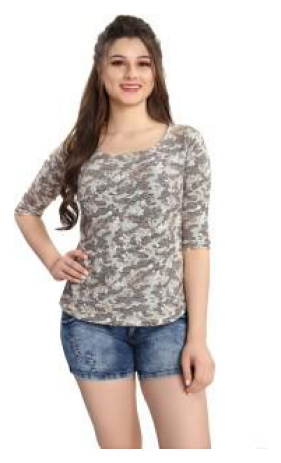

In [19]:
d1.save_sample("demo_image",21)
img = cv2.cvtColor(cv2.imread(f'demo_image.jpeg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

(-0.5, 180.5, 311.5, -0.5)

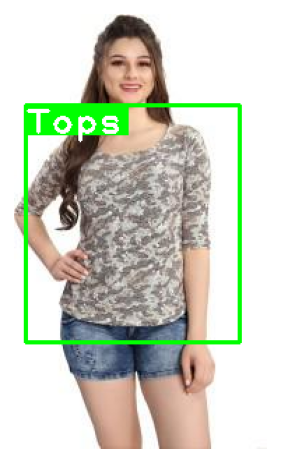

In [20]:
sample=annotation_list[21]
p1=ProcessImage(annotation_list)
p1(sample,img)
plt.imshow(img)
plt.axis("off")

In [21]:
def create_dataset(clothing, categories, dataset_type):

  images_path = Path(f"clothing/images/{dataset_type}")
  images_path.mkdir(parents=True, exist_ok=True)

  labels_path = Path(f"clothing/labels/{dataset_type}")
  labels_path.mkdir(parents=True, exist_ok=True)

  for img_id, row in enumerate(tqdm(clothing)):

    image_name = f"{img_id}.jpeg"

    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert("RGB")

    img.save(str(images_path / image_name), "JPEG")

    label_name = f"{img_id}.txt"

    with (labels_path / label_name).open(mode="w") as label_file:

      for a in row['annotation']:

        for label in a['label']:

          category_idx = categories.index(label)

          points = a['points']
          p1, p2 = points

          x1, y1 = p1['x'], p1['y']
          x2, y2 = p2['x'], p2['y']

          bbox_width = x2 - x1
          bbox_height = y2 - y1

          label_file.write(
            f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}\n"
          )

In [22]:
class Convert_To_Yolo():
  def __init__(self,clothing, categories, dataset_type):
    self.clothing=clothing
    self.categories=categories
    self.dataset_type=dataset_type

  def createdataset(self):
    images_path = Path(f"clothing/images/{self.dataset_type}")
    images_path.mkdir(parents=True, exist_ok=True)

    labels_path = Path(f"clothing/labels/{self.dataset_type}")
    labels_path.mkdir(parents=True, exist_ok=True)

    for img_id, row in enumerate(tqdm(self.clothing)):

      image_name = f"{img_id}.jpeg"

      img = urllib.request.urlopen(row["content"])
      img = Image.open(img)
      img = img.convert("RGB")

      img.save(str(images_path / image_name), "JPEG")

      label_name = f"{img_id}.txt"

      with (labels_path / label_name).open(mode="w") as label_file:

        for a in row['annotation']:

          for label in a['label']:

            category_idx = categories.index(label)

            points = a['points']
            p1, p2 = points

            x1, y1 = p1['x'], p1['y']
            x2, y2 = p2['x'], p2['y']

            bbox_width = x2 - x1
            bbox_height = y2 - y1

            label_file.write(
              f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}\n"
            )

In [23]:
trainset=Convert_To_Yolo(train_clothing, categories, 'train')
testset=Convert_To_Yolo(val_clothing, categories, 'val')

In [24]:
trainset.createdataset()
testset.createdataset()

100%|██████████| 51/51 [00:02<00:00, 19.34it/s]


In [25]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 3028 (delta 10), reused 16 (delta 4), pack-reused 2993
Receiving objects: 100% (3028/3028), 7.19 MiB | 35.06 MiB/s, done.
Resolving deltas: 100% (1999/1999), done.
/content/yolov5


In [26]:
!gdown --id 1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO -O data/clothing.yaml


Downloading...
From: https://drive.google.com/uc?id=1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO
To: /content/yolov5/data/clothing.yaml
100% 172/172 [00:00<00:00, 274kB/s]


In [27]:
!python train.py --img 640 --batch 4 --epochs 30 \
  --data ./data/clothing.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt \
  --name yolov5x_clothing --cache

Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='./data/clothing.yaml', device='', epochs=30, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='yolov5x_clothing', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/yolov5x_clothing', single_cls=False, sync_bn=False, total_batch_size=4, weights='yolov5x.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-11-20 17:57:50.745303: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bia

In [35]:
from utils.utils import plot_results

plot_results();

ModuleNotFoundError: ignored

In [41]:
!find ../clothing/images/val/ -maxdepth 1 -type f | head -50 | xargs cp -t "./inference/images/"

In [55]:
!python detect.py --weights runs/train/yolov5x_clothing/weights/best.pt --conf 0.2 --source inference/videos/walk_Trim.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (429/5426) /content/yolov5/inference/videos/walk_Trim.mp4: 384x640 2 Jacketss, 1 Shirtss, 1 Topss, Done. (0.020s)
video 1/1 (430/5426) /content/yolov5/inference/videos/walk_Trim.mp4: 384x640 2 Jacketss, 1 Topss, Done. (0.021s)
video 1/1 (431/5426) /content/yolov5/inference/videos/walk_Trim.mp4: 384x640 2 Jacketss, 1 Topss, Done. (0.020s)
video 1/1 (432/5426) /content/yolov5/inference/videos/walk_Trim.mp4: 384x640 2 Jacketss, 1 Topss, Done. (0.020s)
video 1/1 (433/5426) /content/yolov5/inference/videos/walk_Trim.mp4: 384x640 2 Jacketss, 1 Topss, Done. (0.020s)
video 1/1 (434/5426) /content/yolov5/inference/videos/walk_Trim.mp4: 384x640 2 Jacketss, 1 Topss, Done. (0.020s)
video 1/1 (435/5426) /content/yolov5/inference/videos/walk_Trim.mp4: 384x640 2 Jacketss, 1 Topss, Done. (0.021s)
video 1/1 (436/5426) /content/yolov5/inference/videos/walk_Trim.mp4: 384x640 2 Jacketss, 1 Topss, Done. (0.020s)
video 1/1 (437/5426) /content/yolo

In [32]:
class HelperClass():
  @staticmethod
  def load_image(img_path: Path, resize=True):
    img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 256), interpolation = cv2.INTER_AREA)
    return img
  @staticmethod
  def show_grid(image_paths):
    images = [HelperClass.load_image(img) for img in image_paths]
    images = torch.as_tensor(images)
    images = images.permute(0, 3, 1, 2)
    grid_img = torchvision.utils.make_grid(images, nrow=11)
    plt.figure(figsize=(24, 12))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis('off');

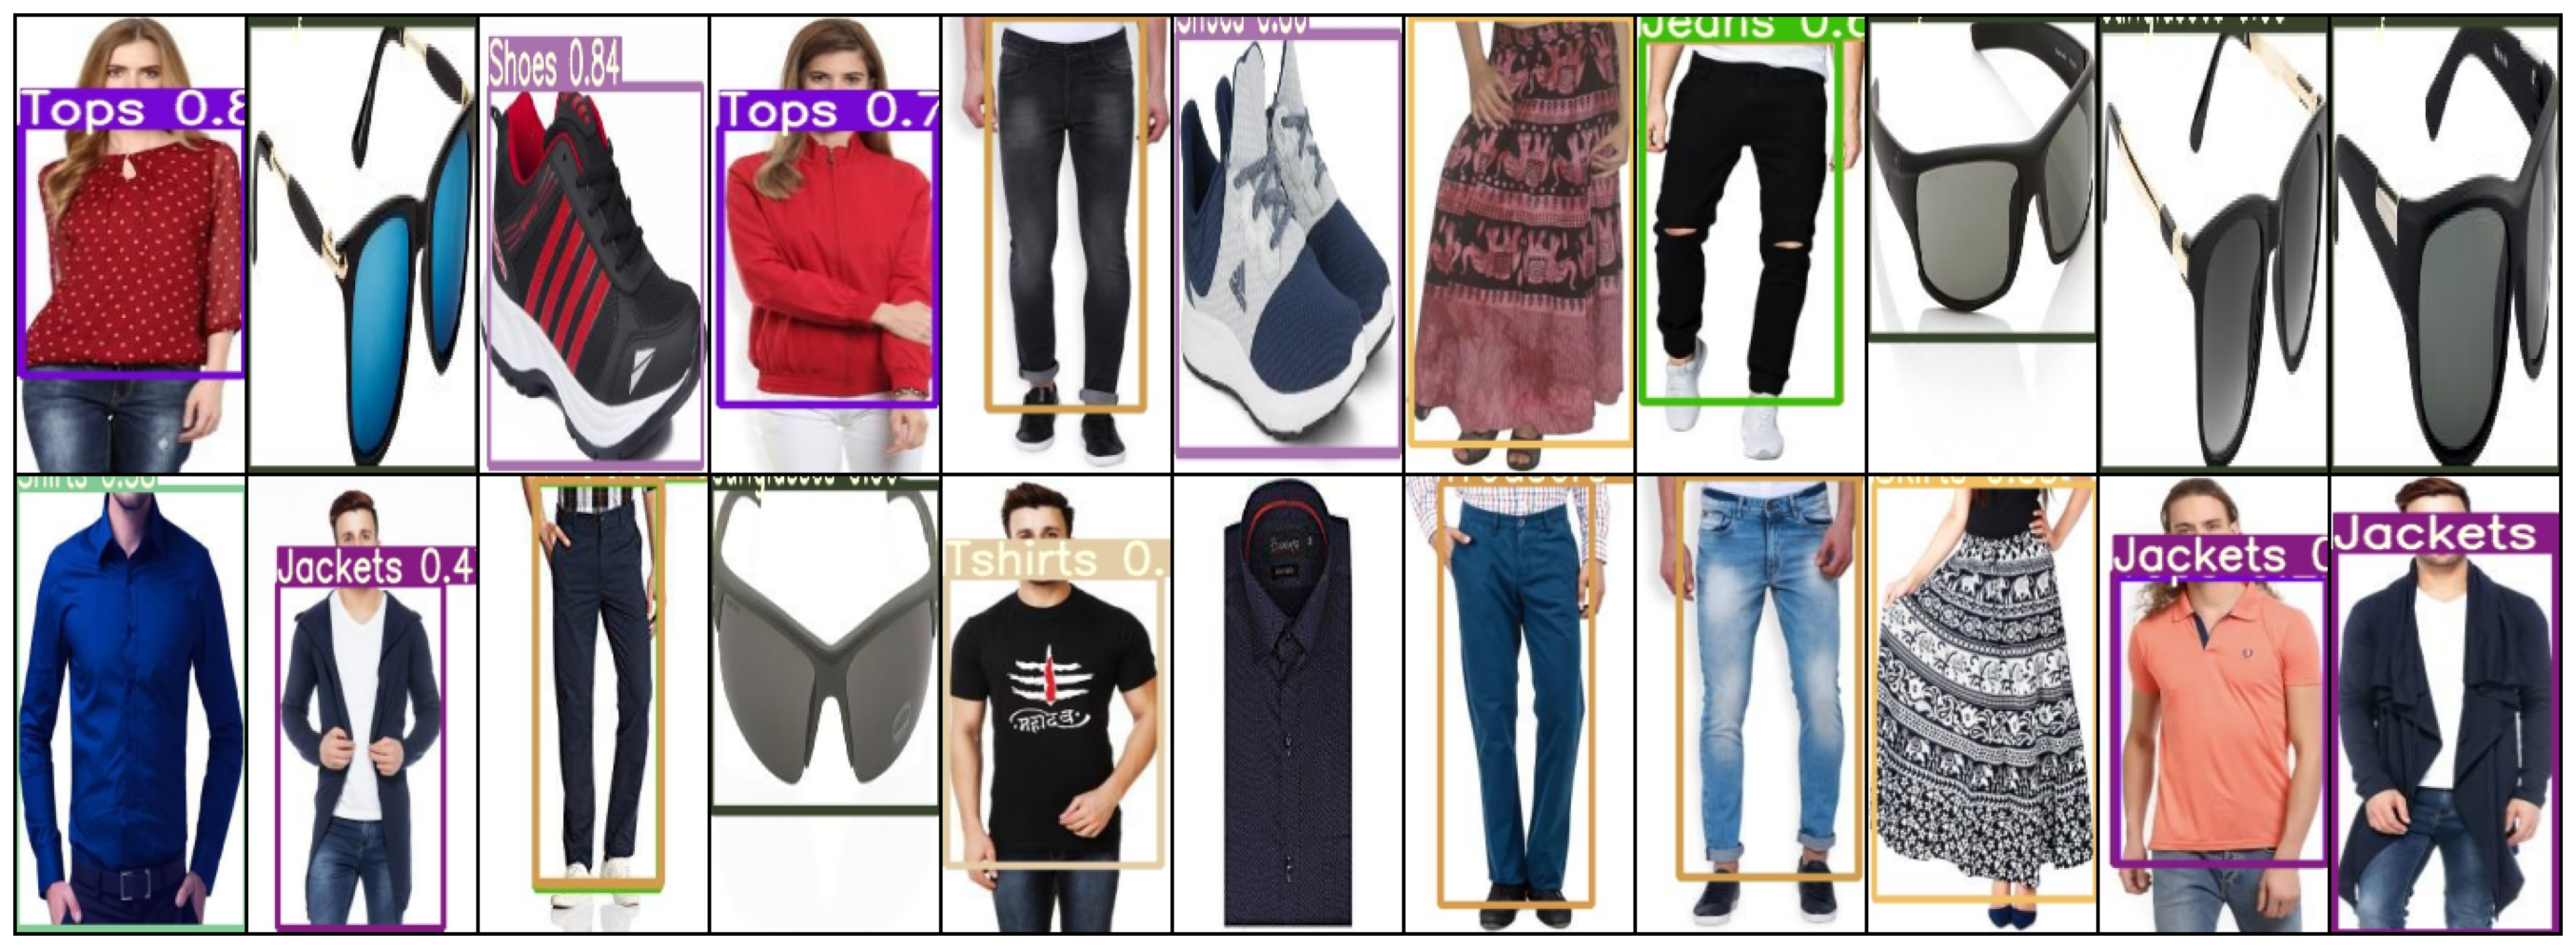

In [48]:
img_paths = list(Path("runs/detect/exp5").glob("*.jpeg"))[:22]
HelperClass.show_grid(img_paths)

In [ ]:
!python detect.py --weights weights/best_yolov5x_clothing.pt \
  --img 640 --conf 0.4 --source ./inference/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', view_img=False, weights='weights/best_yolov5x_clothing.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

/content/yolov5/utils/utils.py:580: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  i, j = (x[:, 5:] > conf_thres).nonzero().t()
image 1/53 inference/images/0.jpeg: 320x640 1 sunglassess, Done. (0.036s)
image 2/53 inference/images/1.jpeg: 640x448 Done. (0.037s)
image 3/53 inference/images/10.jpeg: 640x512 1 Topss, Done. (0.040s)
image 4/53 inference/images/11.jpeg: 640x384 1 Tshirtss, Done. (0.033s)
image 5/53 inference/images/12.jpeg: 640x320 1 Topss, Done. 